In [290]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/studentmat/student-mat.csv


# Analysis and Prediction of Student Scores

In [291]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns #For graphs
import matplotlib as mpl 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import linear_model
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import sklearn
import pickle

# Read data

In [292]:
df = pd.read_csv('../input/studentmat/student-mat.csv')


# Data heads

In [293]:
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,0,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,0,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,0,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,0,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,0,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,1,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,1,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,0,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,1,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,1,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


# Visualization

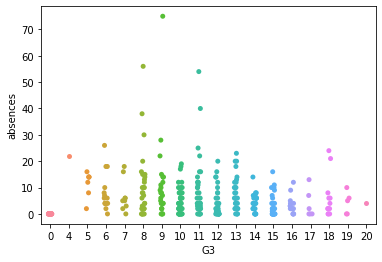

In [294]:
sns.stripplot(x="G3", y="absences", data=df, jitter=True);

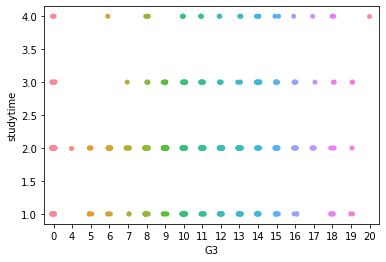

In [295]:
sns.stripplot(x="G3", y="studytime", data=df, jitter=True);

In [296]:
print(df['famsize'].value_counts())
print(df['Pstatus'].value_counts())

GT3    281
LE3    114
Name: famsize, dtype: int64
T    354
A     41
Name: Pstatus, dtype: int64


In [297]:
df1 = pd.get_dummies(df['G3'])
df2 = pd.get_dummies(df['absences'])
df3 = pd.get_dummies(df['sex'])
df = pd.concat([df, df1, df2, df3], axis=1)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,26,28,30,38,40,54,56,75,0,1
0,GP,0,18,U,GT3,A,4,4,at_home,teacher,...,0,0,0,0,0,0,0,0,1,0
1,GP,0,17,U,GT3,T,1,1,at_home,other,...,0,0,0,0,0,0,0,0,1,0
2,GP,0,15,U,LE3,T,1,1,at_home,other,...,0,0,0,0,0,0,0,0,1,0
3,GP,0,15,U,GT3,T,4,2,health,services,...,0,0,0,0,0,0,0,0,1,0
4,GP,0,16,U,GT3,T,3,3,other,other,...,0,0,0,0,0,0,0,0,1,0


# Clustering

In [298]:
kmeans_model = KMeans(n_clusters=3, random_state=1)
# Get only the numeric columns from games.
numericalColumns = df._get_numeric_data()
# Fit the model using the good columns.
kmeans_model.fit(numericalColumns)
# Get the cluster assignments.
labels = kmeans_model.labels_

# PCA

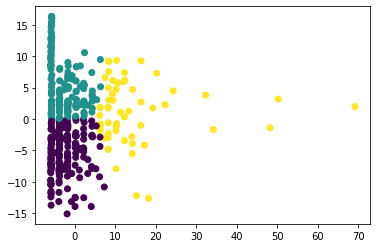

In [299]:
# Create a PCA model.
pca_2 = PCA(2)
# Fit the PCA model on the numeric columns from earlier.
plot_columns = pca_2.fit_transform(numericalColumns)
# Make a scatter plot of each game, shaded according to cluster assignment.
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
# Show the plot.
plt.show()

# Decision Tree Analysis

## Breaking the Data into a Training and Testing Section

In [300]:
train = df.sample(frac=0.8, random_state=1)
# Select anything not in the training set and put it in the testing set.
test = df.loc[~df.index.isin(train.index)]
# Print the shapes of both sets.
print(train.shape)
print(test.shape)

(316, 87)
(79, 87)


In [301]:
unwantedCols = ["school", "sex", "G3","schoolsup","famsup","paid","activities","nursery","higher","internet","romantic",  "famsize","address", "Mjob", "Fjob", "reason", "guardian", "Pstatus"]
columns = df.columns.tolist()
columns = [c for c in columns if c not in unwantedCols]
target = "G3"

# Random Forest

In [302]:
# Initialize the model with some parameters.
model = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)
# Fit the model to the data.
model.fit(train[columns], train[target])
# Make predictions.
predictions = model.predict(test[columns])
# Compute the error.
#sklearn.metrics.mean_squared_error(predictions, test[target])
#mean_squared_error(predictions, test[target])
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(predictions, test[target], squared=False)

print(rms)


0.7250741373125876


# Linear regression

In [303]:
# Select the value we want to predict
predict = "G3"

In [304]:
# List the variables we want to use for our predictions in this model
data = df[[ "G1", "G2","G3", "studytime", "health", "failures", "absences"]]
data = shuffle(data)

In [305]:
x = np.array(data.drop([predict], 1))
y = np.array(data[predict])

In [306]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)

# Highest accuracy Calculation

In [307]:
# Train model multiple times to find the highest accuracy
best = 0
for _ in range(200):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Accuracy: " + str(acc))

    # Save the highest accuracy
    if (acc > best):
        best = acc
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)
print("Highest Accuracy:", best)

Accuracy: 0.9245360106365648
Accuracy: 0.5247498833869952
Accuracy: 0.8887847593498783
Accuracy: 0.8198083790300253
Accuracy: 0.7552258284907987
Accuracy: 0.8939230130911364
Accuracy: 0.8597224409312745
Accuracy: 0.7729877029921168
Accuracy: 0.8433074428772488
Accuracy: 0.8276465916067788
Accuracy: 0.8099033515943491
Accuracy: 0.934378945781055
Accuracy: 0.772199766443269
Accuracy: 0.7310120813929093
Accuracy: 0.8987470898487631
Accuracy: 0.8254954695669621
Accuracy: 0.8643220017818392
Accuracy: 0.9385927517288944
Accuracy: 0.9488664413729305
Accuracy: 0.8264060627183085
Accuracy: 0.9068054158570859
Accuracy: 0.7721016326263037
Accuracy: 0.7747375055625729
Accuracy: 0.7200725239814203
Accuracy: 0.744795248955337
Accuracy: 0.7892029331011422
Accuracy: 0.8774015322834392
Accuracy: 0.8505583623480362
Accuracy: 0.6892049714853277
Accuracy: 0.7714179076202585
Accuracy: 0.8052125715048964
Accuracy: 0.7267459949052066
Accuracy: 0.7881780662374409
Accuracy: 0.9049025697446603
Accuracy: 0.73812

# Model Coefficient & Intercept

In [308]:
# Load model
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)

print("-------------------------")
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print("-------------------------")

predictions = linear.predict(x_test)

-------------------------
Coefficient: 
 [ 0.15581919  0.9774154  -0.17030317  0.09056086 -0.26890779  0.0399191 ]
Intercept: 
 -1.9028343556926473
-------------------------


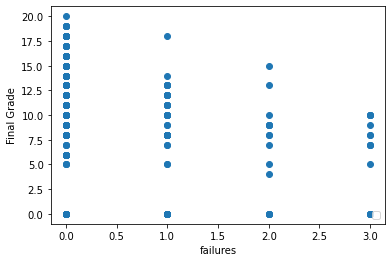

In [309]:
# Create visualisation of the model
plot = "failures"
plt.scatter(data[plot], data["G3"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()

In [310]:
print('Mean Abolute Error:', metrics.mean_absolute_error(y_test, predictions))

print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Abolute Error: 0.984280596435136
Mean Squared Error: 2.7225204416263615
Root Mean Squared Error: 1.6500061944206033
